In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim


In [8]:
image = cv2.imread("ipa.jpeg")
if image is None:
    raise FileNotFoundError("Image not found! Please check filename or path.")
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image, (512, 512))


def add_gaussian_noise(img, mean=0, var=0.01):
    row, col, ch = img.shape
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = img / 255.0 + gauss
    noisy = np.clip(noisy, 0, 1)
    return np.uint8(noisy * 255)

gaussian_noisy = add_gaussian_noise(image)


def add_salt_pepper_noise(img, prob=0.02):
    output = np.copy(img)
    black = 0
    white = 255
    probs = np.random.rand(img.shape[0], img.shape[1])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

sp_noisy = add_salt_pepper_noise(image)

In [9]:
# Step 3: Preprocessing & Enhancement
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)
contrast_stretched = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

In [11]:
# Step 4: Noise Filtering & Denoising
def apply_median_filter_sp():
    return cv2.medianBlur(sp_noisy, 3)
def apply_gaussian_filter_gn():
    return cv2.GaussianBlur(gaussian_noisy, (5, 5), 1)

median_filtered = apply_median_filter_sp()
gaussian_filtered = apply_gaussian_filter_gn()

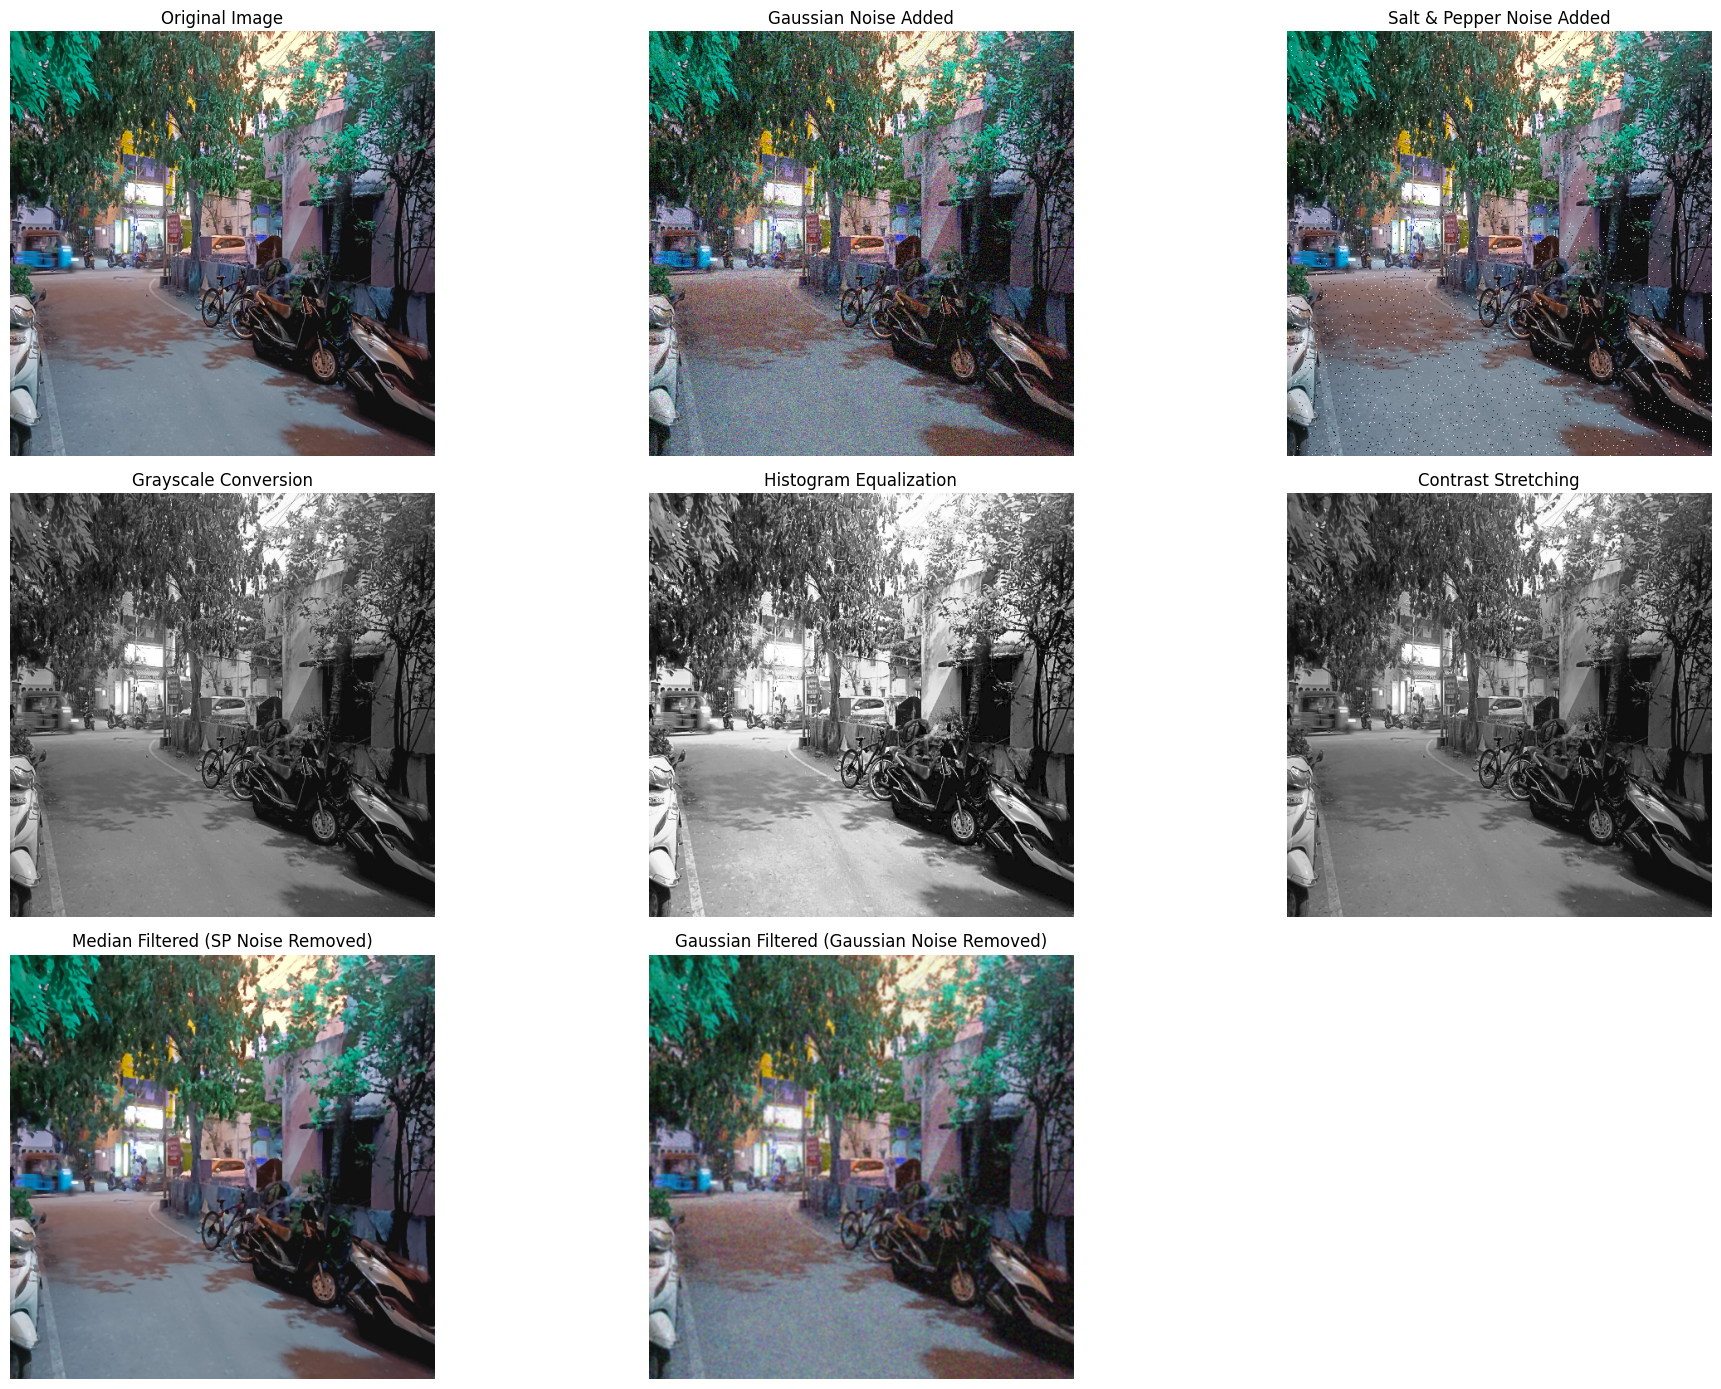

In [12]:
# Step 5: Display Preprocessing and Filtering Results
plt.figure(figsize=(20, 14))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(gaussian_noisy, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Noise Added")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(sp_noisy, cv2.COLOR_BGR2RGB))
plt.title("Salt & Pepper Noise Added")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Conversion")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(hist_eq, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(contrast_stretched, cmap="gray")
plt.title("Contrast Stretching")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title("Median Filtered (SP Noise Removed)")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filtered (Gaussian Noise Removed)")
plt.axis("off")

plt.tight_layout()
plt.show()

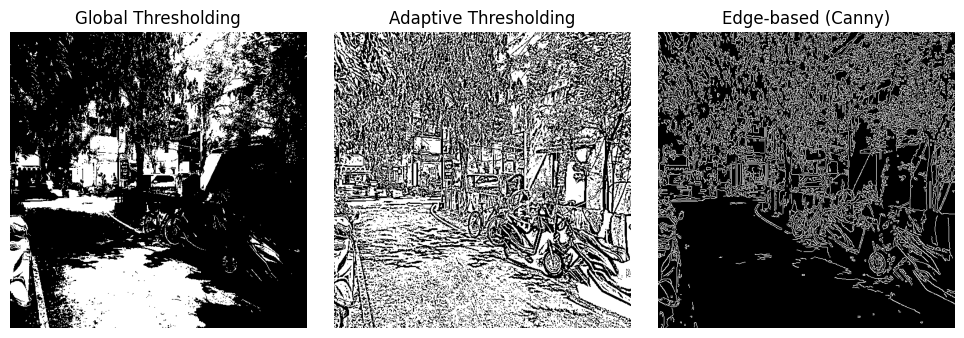

In [13]:
# Step 6: Segmentation and Object Isolation
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Global Thresholding
_, thresh_seg = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Edge-based (Canny)
edges = cv2.Canny(gray_img, 100, 200)

# Display smaller segmentation results
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(thresh_seg, cmap='gray')
plt.title("Global Thresholding")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edge-based (Canny)")
plt.axis("off")

plt.tight_layout(pad=2.0)
plt.show()


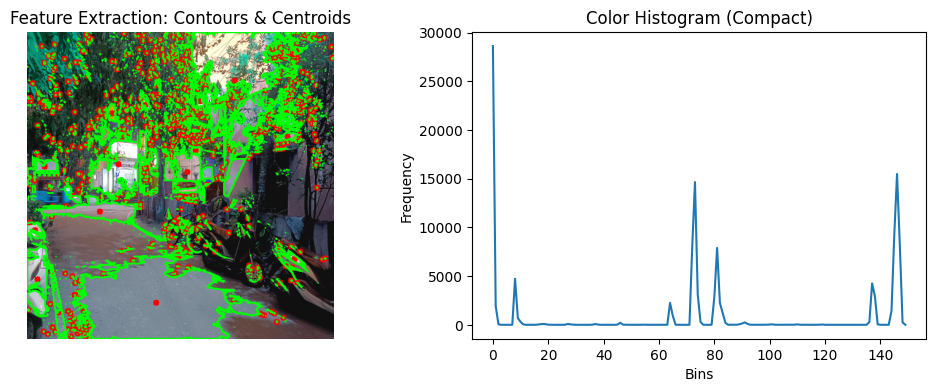

Number of objects detected: 2161
Areas of objects: [1.0, 0.5, 0.5, 1.0, 0.5, 4.0, 0.5, 3.5, 1.0, 0.5, 0.5, 7.0, 1.5, 1.5, 0.5, 3.5, 1.5, 1.0, 1.0, 1.0, 4.0, 3.5, 0.5, 2.5, 0.5, 1.5, 1.0, 1.5, 1.0, 1.0, 2.5, 5.0, 14.5, 0.5, 1.5, 0.5, 1.0, 2.0, 0.5, 0.5, 0.5, 1.5, 897.0, 4.5, 3.0, 4.0, 1.0, 4.5, 0.5, 1.0, 3.0, 4.0, 3.0, 3.0, 87.0, 45.0, 3.5, 2.0, 1.0, 27410.0, 167.0, 1.0, 16.5, 7.0, 2.0, 0.5, 280.0, 6.5, 38.0, 12.0, 1.5, 1.0, 24.0, 8.0, 13.0, 0.5, 2.0, 57.0, 3.5, 5.0, 2.5, 2871.5, 4.5, 2.0, 5.0, 3.5, 0.5, 0.5, 16.0, 0.5, 3.0, 6.5, 0.5, 1.5, 0.5, 4.0, 18.0, 23.5, 1.0, 13.0, 3.0, 5.5, 8.0, 3.0, 435.0, 1.0, 3.0, 2.0, 7.0, 42.5, 0.5, 17.0, 1.0, 0.5, 7.0, 17.5, 0.5, 1.5, 0.5, 6.0, 0.5, 40.0, 6.0, 3.0, 1.5, 3.5, 3.0, 48.0, 0.5, 2.0, 1.0, 29.0, 0.5, 3438.5, 0.5, 6.0, 0.5, 3.0, 8.0, 0.5, 19.5, 0.5, 3.5, 59.5, 0.5, 9.5, 262.0, 41.5, 6.0, 0.5, 6.5, 1.5, 1.5, 1.0, 17.0, 1.0, 1.0, 4.5, 4.5, 0.5, 5.0, 7.0, 8.0, 2.5, 3.5, 1.5, 0.5, 3.0, 0.5, 6.5, 0.5, 1.0, 2.5, 5.0, 9.0, 0.5, 2.5, 3.0, 2.0, 3.5, 1.0, 

In [14]:
# Step 7: Feature Evaluation
contours, _ = cv2.findContours(thresh_seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
feature_image = image.copy()

areas = []
centroids = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        centroids.append((cx, cy))
        areas.append(area)
        cv2.circle(feature_image, (cx, cy), 5, (0, 0, 255), -1)
    cv2.drawContours(feature_image, [cnt], -1, (0, 255, 0), 2)

# Color histogram
color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
                          [0, 256, 0, 256, 0, 256])


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB))
plt.title("Feature Extraction: Contours & Centroids")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.plot(color_hist.flatten()[:150])
plt.title("Color Histogram (Compact)")
plt.xlabel("Bins")
plt.ylabel("Frequency")

plt.tight_layout(pad=1.0)
plt.show()

print(f"Number of objects detected: {len(contours)}")
print(f"Areas of objects: {areas}")
print(f"Centroids of objects: {centroids}")


In [15]:
# Step 8: Quantitative Evaluation
def evaluate_psnr_ssim(original, filtered):
    psnr_val = psnr(original, filtered, data_range=255)
    ssim_val = ssim(original, filtered, data_range=255, channel_axis=-1, win_size=7)
    return psnr_val, ssim_val

psnr_median, ssim_median = evaluate_psnr_ssim(image, median_filtered)
psnr_gaussian, ssim_gaussian = evaluate_psnr_ssim(image, gaussian_filtered)

print("\n--- Quantitative Evaluation ---")
print("Median Filter -> PSNR:", psnr_median, "SSIM:", ssim_median)
print("Gaussian Filter -> PSNR:", psnr_gaussian, "SSIM:", ssim_gaussian)



--- Quantitative Evaluation ---
Median Filter -> PSNR: 23.404652190480913 SSIM: 0.7903477747240443
Gaussian Filter -> PSNR: 22.82056201269476 SSIM: 0.658762704933257
